# Visitor

1. Permite definir uma classe visitante específica que implementa algorítimos diferentes dependendo da classe que está visitando
2. Permite que diferentes ações sejam feitas em cada classe, sem que essas classes sejam modificadas de forma significativa

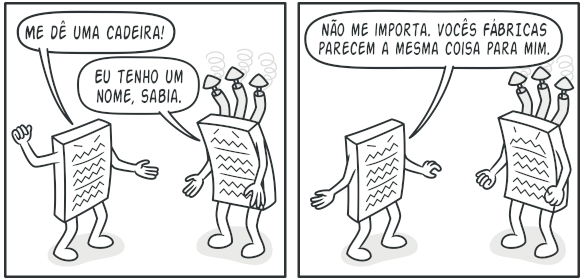


## Contexto
1. Uma classe de seguros irá implementar seguros em cada um dos estabelecimentos de acordo com sua necessidade
2. Open/closed principle: embora os seguros que serão emplantados em cada uma das classes de estabelecimento sejam diferentes, a classe do estabelecimento em si não será modificada, apenas será adicionado o método de aceitação de visitantes make_insurance()
3. A classe insurance será a visitante que terá um método específico para cada tipo de estabelecimento


In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List


### Interface da classe visitante

In [11]:
class Insurance(ABC):

    @abstractmethod
    def for_residencial_building(self, building: ResidencialBuilding): pass

    @abstractmethod
    def for_bank(self, bank: Bank): pass

    @abstractmethod
    def for_coffe_house(self, coffe_house: CoffeHouse): pass


### Classe visitante concreta
1. Essa classe implementa um método de 'fazer seguro' para cada estabelcimento diferente

In [3]:
class InsuranceCompany(Insurance):

    def for_residencial_building(self, building: ResidencialBuilding):
        building.insurances.append(
            'Medical and structural insurance for the residents')

    def for_bank(self, bank: Bank):
        bank.insurances.append('Insurante against robbery')

    def for_coffe_house(self, coffe_house: CoffeHouse):
        coffe_house.insurances.append('Insurance against acidents and floods')


### Estabelecimento abstrato
1. Essa classe define um método abstrato que aceita visitantes.
2. Esse método é sobrescrito em cada classe de acordo com o que o visitante fará naquela classe

In [4]:
class Stablishment(ABC):

    def __init__(self, name: str):
        self.name = name
        self.insurances: List[str] = []

    @abstractmethod  # Método que aceita visitantes
    def make_insurance(self, visitor: Insurance): pass



### Estabelcimento conretos
1. Cada estabelecimento sobrescreve o méotdo de aceitação de acordo com sua necessidade

In [5]:
class ResidencialBuilding(Stablishment):

    def make_insurance(self, visitor: Insurance):
        print(f'The {self.__class__.__name__} got', end=' ')
        visitor.for_residencial_building(self)
        print(self.insurances)


class Bank(Stablishment):

    def make_insurance(self, visitor: Insurance):
        print(f'The {self.__class__.__name__} got', end=' ')
        visitor.for_bank(self)
        print(self.insurances)


class CoffeHouse(Stablishment):

    def make_insurance(self, visitor: Insurance):
        print(f'The {self.__class__.__name__} got', end=' ')
        visitor.for_coffe_house(self)
        print(self.insurances)


In [6]:
insurance = InsuranceCompany()

In [7]:
building = ResidencialBuilding('Plaza')
bank = Bank('Banco do Brasil')
coffe_house = CoffeHouse('Central Perk')

O código de implementação de cada um dos seguros não importa para o código cliente, mas cada estabelecimento tem um seguro específco para as suas necessidades

In [12]:
building.make_insurance(insurance)

The ResidencialBuilding got ['Medical and structural insurance for the residents', 'Medical and structural insurance for the residents']


In [13]:
bank.make_insurance(insurance)

The Bank got ['Insurante against robbery', 'Insurante against robbery']


In [14]:
coffe_house.make_insurance(insurance)

The CoffeHouse got ['Insurance against acidents and floods', 'Insurance against acidents and floods']
